In [ ]:
'''
Each of us shoul be able to explain our part of the code.
Please add comments to your code to explain what each part does.
All team members should be able to run the code and understand the output.
'''




import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataset_HR.csv")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=cat_cols.drop('Attrition'), drop_first=True)

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("\nTrain Distribution of 'Attrition':")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))

Train Shape: (960, 14)
Test Shape: (240, 14)

Train Distribution of 'Attrition':
Attrition
0    76.88%
1    23.12%
Name: proportion, dtype: object


First part will be presented by ahmet

From here till end ergi will explain what does this code do and prepare for the presentation

In [ ]:

X = df.drop('Attrition', axis=1)
Y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
# Model tanımı
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)


In [9]:
print("🎯 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

🎯 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       194
           1       0.00      0.00      0.00        46

    accuracy                           0.80       240
   macro avg       0.40      0.49      0.44       240
weighted avg       0.65      0.80      0.72       240



from here till end will be presented by alban 

In [14]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("📊 Evaluation Metrics:")
print(f"✅ Accuracy:  {acc:.4f}")
print(f"🎯 Precision: {prec:.4f}")
print(f"📈 Recall:    {rec:.4f}")
print(f"🏅 F1-score:  {f1:.4f}")

# Ek olarak detaylı rapor
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Evaluation Metrics:
✅ Accuracy:  0.7708
🎯 Precision: 0.5000
📈 Recall:    0.0182
🏅 F1-score:  0.0351

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       185
           1       0.50      0.02      0.04        55

    accuracy                           0.77       240
   macro avg       0.64      0.51      0.45       240
weighted avg       0.71      0.77      0.68       240



/Users/ahmeteren/MachineLearningProject/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


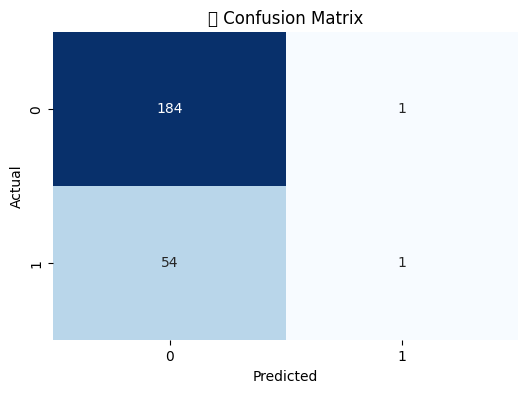

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix")
plt.show()